Now we consider a 2 DOF system. 

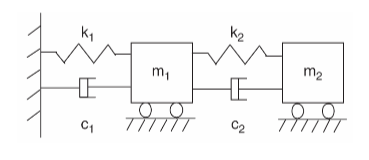

We define the system matrices. K, M , C

In [2]:
# Import necessary packages and modules
import numpy as np
from scipy import linalg as spla
import sys
sys.path.append('./../modules')
from time_integration import * # Import all functions in the module time_integration
from matplotlib import pyplot as plt 

# Define structural properties
m = 1.0 # Mass of each story
k = 100.0 # Stiffness
MM = np.eye(2)*m # Mass matrix
KK = np.array(([[2, -1], [-1, 1]]))*k # Stiffness matrix

# Calculate modes and frequencies
lam,v = spla.eig(KK,MM) #Solve eigenvalue problem using scipy 
#lam = np.reshape(lam, (1, lam.shape[0]))
v[:,0] = v[:,0]/np.max(v[:,0]) #Normalize the eigenvector
v[:,1] = v[:,1]/np.max(v[:,1])
f = np.real(lam)**0.5/2/np.pi #Natural frequencies in Hz
omega = f*2*np.pi # Natural frequencies in rad/s

# Rayleigh damping
zeta = np.array(([5.0, 5.0]))/100
alpha1 = 2*omega[0]*omega[1]*(zeta[1]*omega[0]-zeta[0]*omega[1])/(omega[0]**2-omega[1]**2)
alpha2 = 2*(zeta[0]*omega[0]-zeta[1]*omega[1])/(omega[0]**2-omega[1]**2)
CC = alpha1*MM + alpha2*KK

In [4]:
omega

array([16.18033989,  6.18033989])

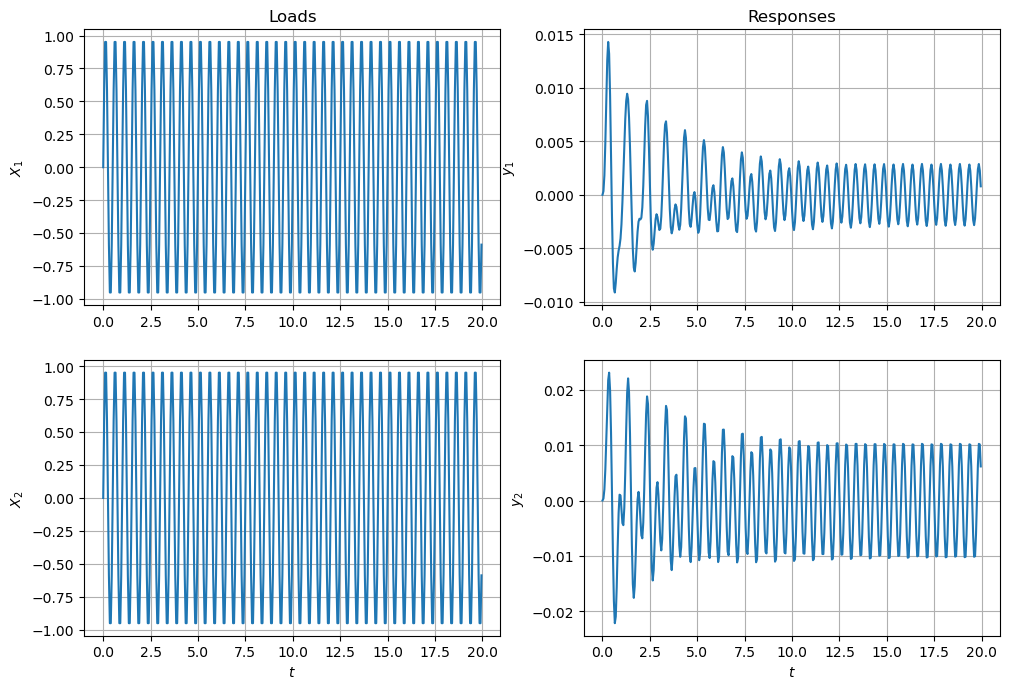

In [5]:
h = 0.05 #Time step
t = np.arange(0.,20.,h) # Time vector
fl = 2.0 # Load frequency
po = 100.0 # Load amplitude
u0 = np.array([[0.0], [0.0]]) #Initial displacement
udot0 = np.array([[0.0], [0.0]]) # Initial velocity
beta = 1.0/4.0 # Facor in Newmark's method
gamma = 1.0/2.0 # Factor in Newmark's method
X = np.vstack((np.sin(2.0*np.pi*fl*t),np.sin(2.0*np.pi*fl*t)))
y, ydot, y2dot = linear_newmark_krenk(MM,CC,KK,X,u0,udot0,h,gamma,beta)

# Plot deterministic dynamic load and response
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(2,2,figsize=(30*cm, 20*cm))
axs[0,0].plot(t, X[0,:])
axs[0,0].set_ylabel('$X_1$')
axs[0,0].set_title('Loads')
axs[0,0].grid(True)

axs[1,0].plot(t, X[1,:])
axs[1,0].set_ylabel('$X_2$')
axs[1,0].set_xlabel('$t$')
axs[1,0].grid(True)


axs[0,1].plot(t, y[0,:])
axs[0,1].set_ylabel('$y_1$')
axs[0,1].set_title('Responses')
axs[0,1].grid(True)

axs[1,1].plot(t, y[1,:])
axs[1,1].set_ylabel('$y_2$')
axs[1,1].set_xlabel('$t$')
axs[1,1].grid(True)

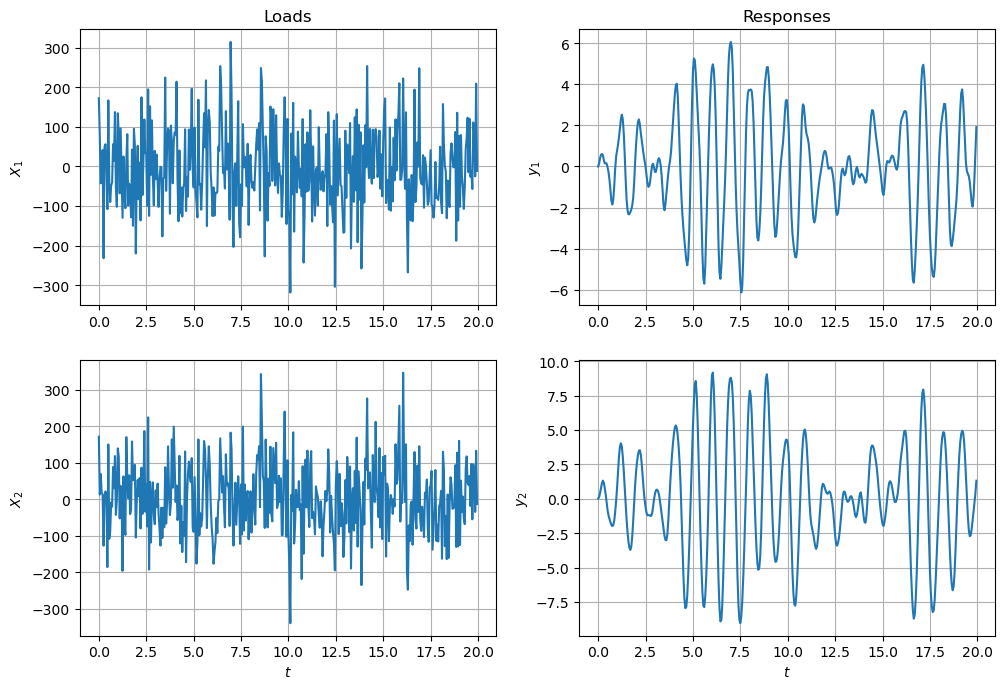

In [9]:
# Now, stochastic


rho_X1_X2 = 0.8 # Load correlation coefficient
stdX1 = 100.0 # Standard deviation X1
stdX2 = 100.0 # Standard deviation X2

covmX = np.array(([[stdX1**2, rho_X1_X2*stdX1*stdX2], [rho_X1_X2*stdX1*stdX2, stdX2**2]])) # Covariance matrix of the loads
lam,v = spla.eig(covmX) #Solve eigenvalue problem using scipy 
covmX_modal = np.matmul(np.matmul(v.T,covmX),v) # Transform covariance matrix to uncorrelated space

U = np.vstack((np.random.normal(0, covmX_modal[0,0]**0.5, t.shape[0]),np.random.normal(0, covmX_modal[1,1]**0.5, t.shape[0])))
X = np.matmul(v,U) # Transform to correlated space

y, ydot, y2dot = linear_newmark_krenk(MM,CC,KK,X,u0,udot0,h,gamma,beta)

# Plot stochastic dynamic load and response
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(2,2,figsize=(30*cm, 20*cm))
axs[0,0].plot(t, X[0,:])
axs[0,0].set_ylabel('$X_1$')
axs[0,0].set_title('Loads')
axs[0,0].grid(True)

axs[1,0].plot(t, X[1,:])
axs[1,0].set_ylabel('$X_2$')
axs[1,0].set_xlabel('$t$')
axs[1,0].grid(True)


axs[0,1].plot(t, y[0,:])
axs[0,1].set_ylabel('$y_1$')
axs[0,1].set_title('Responses')
axs[0,1].grid(True)

axs[1,1].plot(t, y[1,:])
axs[1,1].set_ylabel('$y_2$')
axs[1,1].set_xlabel('$t$')
axs[1,1].grid(True)


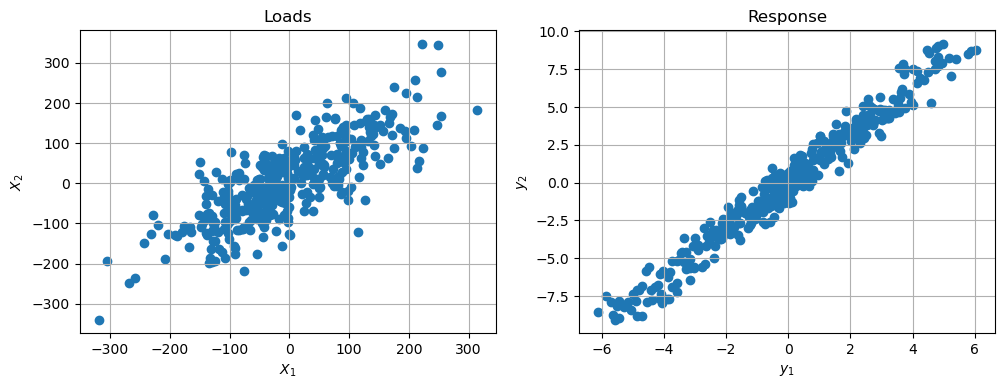

In [10]:
# Plot scatter plot of dynamic loads and response
fig, axs = plt.subplots(1,2,figsize=(30*cm, 10*cm))
axs[0].scatter(X[0,:],X[1,:])
axs[0].set_ylabel('$X_2$')
axs[0].set_xlabel('$X_1$')
axs[0].set_title('Loads')
axs[0].grid(True)

axs[1].scatter(y[0,:],y[1,:])
axs[1].set_ylabel('$y_2$')
axs[1].set_xlabel('$y_1$')
axs[1].set_title('Response')
axs[1].grid(True)

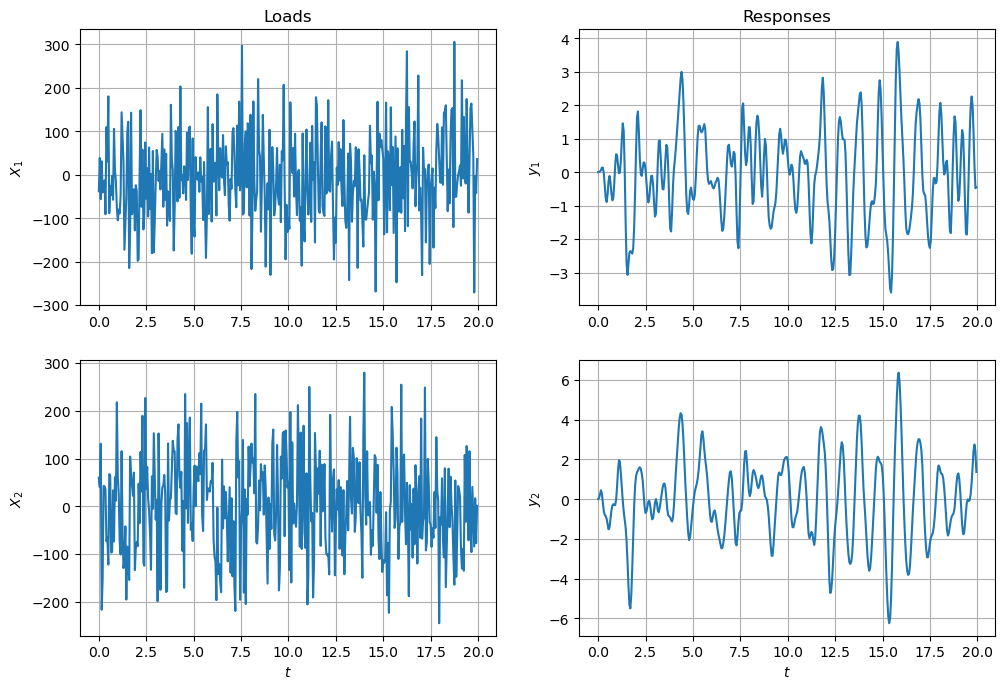

In [11]:
rho_X1_X2 = 0 # Load correlation coefficient

covmX = np.array(([[stdX1**2, rho_X1_X2*stdX1*stdX2], [rho_X1_X2*stdX1*stdX2, stdX2**2]])) # Covariance matrix of the loads
lam,v = spla.eig(covmX) #Solve eigenvalue problem using scipy 
covmX_modal = np.matmul(np.matmul(v.T,covmX),v) # Transform covariance matrix to uncorrelated space

U = np.vstack((np.random.normal(0, covmX_modal[0,0]**0.5, t.shape[0]),np.random.normal(0, covmX_modal[1,1]**0.5, t.shape[0])))
X = np.matmul(v,U) # Transform to correlated space

y, ydot, y2dot = linear_newmark_krenk(MM,CC,KK,X,u0,udot0,h,gamma,beta)

# Plot stochastic dynamic load and response
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(2,2,figsize=(30*cm, 20*cm))
axs[0,0].plot(t, X[0,:])
axs[0,0].set_ylabel('$X_1$')
axs[0,0].set_title('Loads')
axs[0,0].grid(True)

axs[1,0].plot(t, X[1,:])
axs[1,0].set_ylabel('$X_2$')
axs[1,0].set_xlabel('$t$')
axs[1,0].grid(True)


axs[0,1].plot(t, y[0,:])
axs[0,1].set_ylabel('$y_1$')
axs[0,1].set_title('Responses')
axs[0,1].grid(True)

axs[1,1].plot(t, y[1,:])
axs[1,1].set_ylabel('$y_2$')
axs[1,1].set_xlabel('$t$')
axs[1,1].grid(True)


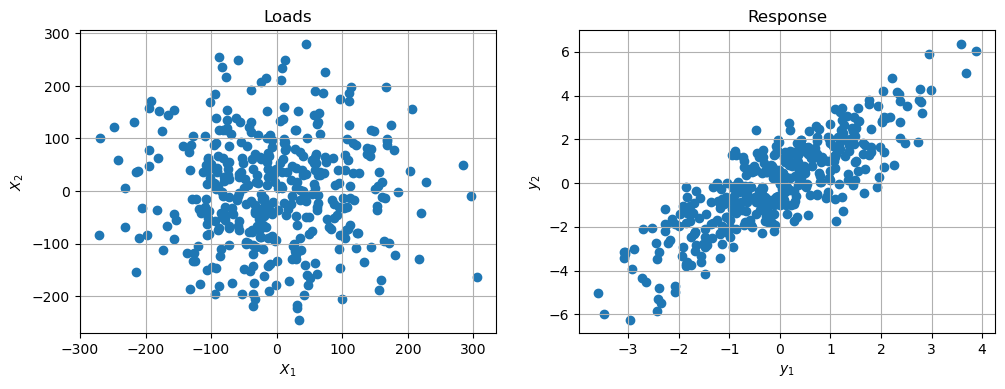

In [12]:
# Plot scatter plot of dynamic loads and response
fig, axs = plt.subplots(1,2,figsize=(30*cm, 10*cm))
axs[0].scatter(X[0,:],X[1,:])
axs[0].set_ylabel('$X_2$')
axs[0].set_xlabel('$X_1$')
axs[0].set_title('Loads')
axs[0].grid(True)

axs[1].scatter(y[0,:],y[1,:])
axs[1].set_ylabel('$y_2$')
axs[1].set_xlabel('$y_1$')
axs[1].set_title('Response')
axs[1].grid(True)